In [1]:
print('[INFO] import necessary packages')
from keras.models import Sequential
#from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Flatten, Dense
from keras import backend as K
from keras.optimizers import SGD
from sklearn.metrics import classification_report
from keras.datasets import mnist
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt

[INFO] import necessary packages


C:\Users\RAVIKUMAR\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print('[INFO] loading data from keras datasets')
(train_data, train_labels), (test_data, test_label) = mnist.load_data()

[INFO] loading data from keras datasets


In [3]:
print("[INFO] training and test data shape")
train_data.shape, test_data.shape

[INFO] training and test data shape


((60000, 28, 28), (10000, 28, 28))

In [4]:
print("[INFO] performing normalisation")
trainX_ = train_data.astype("float") / 255.0
testX_ = test_data.astype("float") / 255.0
trainX = trainX_.reshape((trainX_.shape[0], 784))
testX = testX_.reshape((testX_.shape[0], 784))
labels = ['0.', '1', '2', '3', '4', '5', '6', '7', '8', '9']

[INFO] performing normalisation


In [5]:
print("[INFO] one hot encode with keras")
trainY = to_categorical(train_labels)
testY = to_categorical(test_label)

[INFO] one hot encode with keras


In [6]:
print("[INFO]defining architecture using Keras")
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

[INFO]defining architecture using Keras


[INFO] training network...
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 11s 180us/step - loss: 0.4463 - acc: 0.8774 - val_loss: 0.2408 - val_acc: 0.9311
Epoch 2/10
60000/60000 [==============================] - 12s 205us/step - loss: 0.2215 - acc: 0.9366 - val_loss: 0.1818 - val_acc: 0.9473
Epoch 3/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.1667 - acc: 0.9514 - val_loss: 0.1458 - val_acc: 0.9572
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.1334 - acc: 0.9615 - val_loss: 0.1249 - val_acc: 0.96120s - loss: 0.1346
Epoch 5/10
60000/60000 [==============================] - 11s 175us/step - loss: 0.1106 - acc: 0.9681 - val_loss: 0.1077 - val_acc: 0.9668
Epoch 6/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0943 - acc: 0.9726 - val_loss: 0.0997 - val_acc: 0.9694
Epoch 7/10
60000/60000 [==============================] - 11s 187us/step

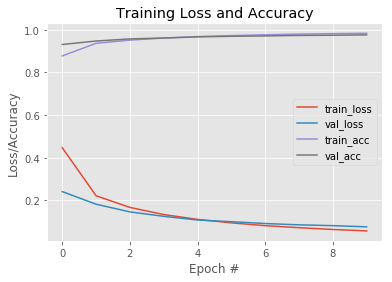

In [7]:
print("[INFO] training network...")
sgd = SGD(0.01)
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY),epochs=10, batch_size=16)

print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=16)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1),target_names= labels))

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 10), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 10), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 10), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()